# CREDIT CARD FRAUD PREDICTION WITH MACHINE LEARNING MODELS

### Problem Statement
The digital world is fast rising and the use of credit cards has become a common mode of payment in recent times.
But as the use of credit card rises, so also is the rise of financial frauds and identity theft. 

With evolving technologies, machine learning models can be trained to detect such fradulent activities before they occur, so as to curb them. 

In this project we will predict fraudulent credit card transactions with supervised machine learning models. We will be analysing a customer-level data that was collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

### About the Dataset
Our dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data are not provided. 

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Feature 'Class' is the response variable, and it takes value 1 in case of fraud and 0 otherwise.

### Methodology

Supervised learning is a means of creating artificial intelligence (AI), where a computer algorithm is trained with input data that has been labeled, and forms a model to enable it to predict the response to new input data.
models used in this analysis are:- 

The Logistic regression Algorithim

K nearest Neighbour Algorithim

Random Forest Classifier

XGBoost

Super Vector Machines Algorithim

These models have been selected as they are best for classification problems and and are able to handle the imbalanced nature of our dataset.

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
# Splitting the dataset into X and y
y= df['Class']
X = df.drop(['Class'], axis=1)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#check dataframe content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:>

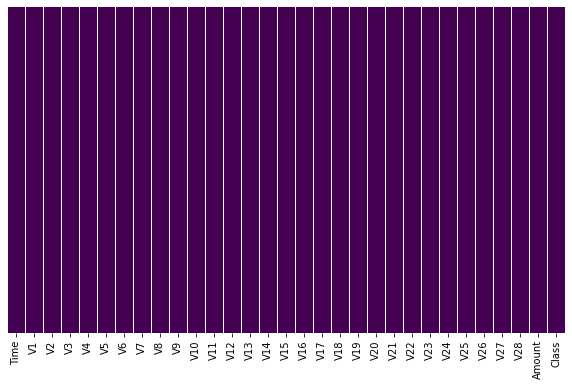

In [8]:
#visual missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [9]:
#statistical summary of our data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
#check column names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

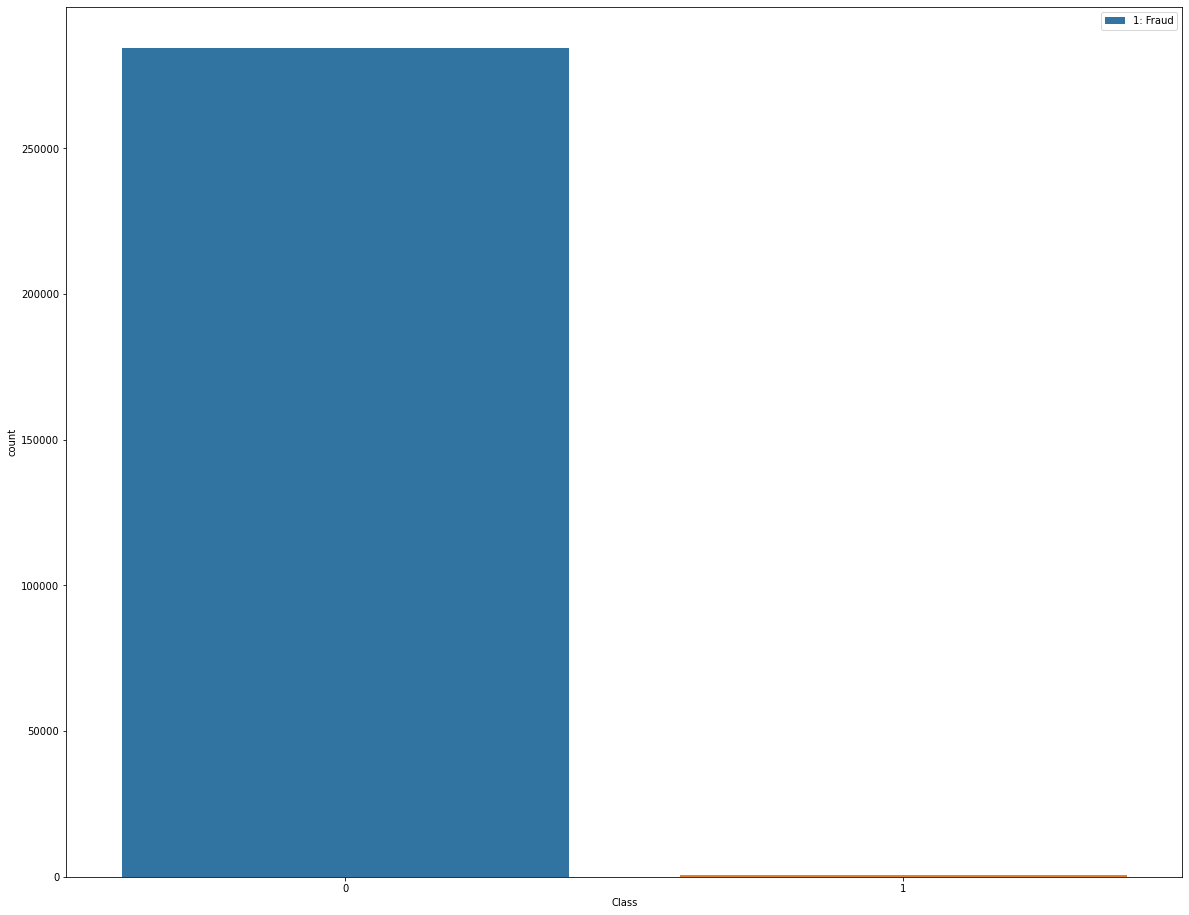

In [11]:
#visualize target variable
plt.figure(figsize=(20,16))
sns.countplot(x= 'Class', data = df)
plt.legend(["1: Fraud","0: Not Fraud"])

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

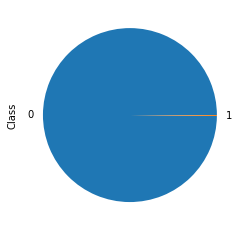

In [12]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count()) *100)
((df.groupby('Class')['Class'].count()/df['Class'].count()) *100).plot.pie()

<AxesSubplot:>

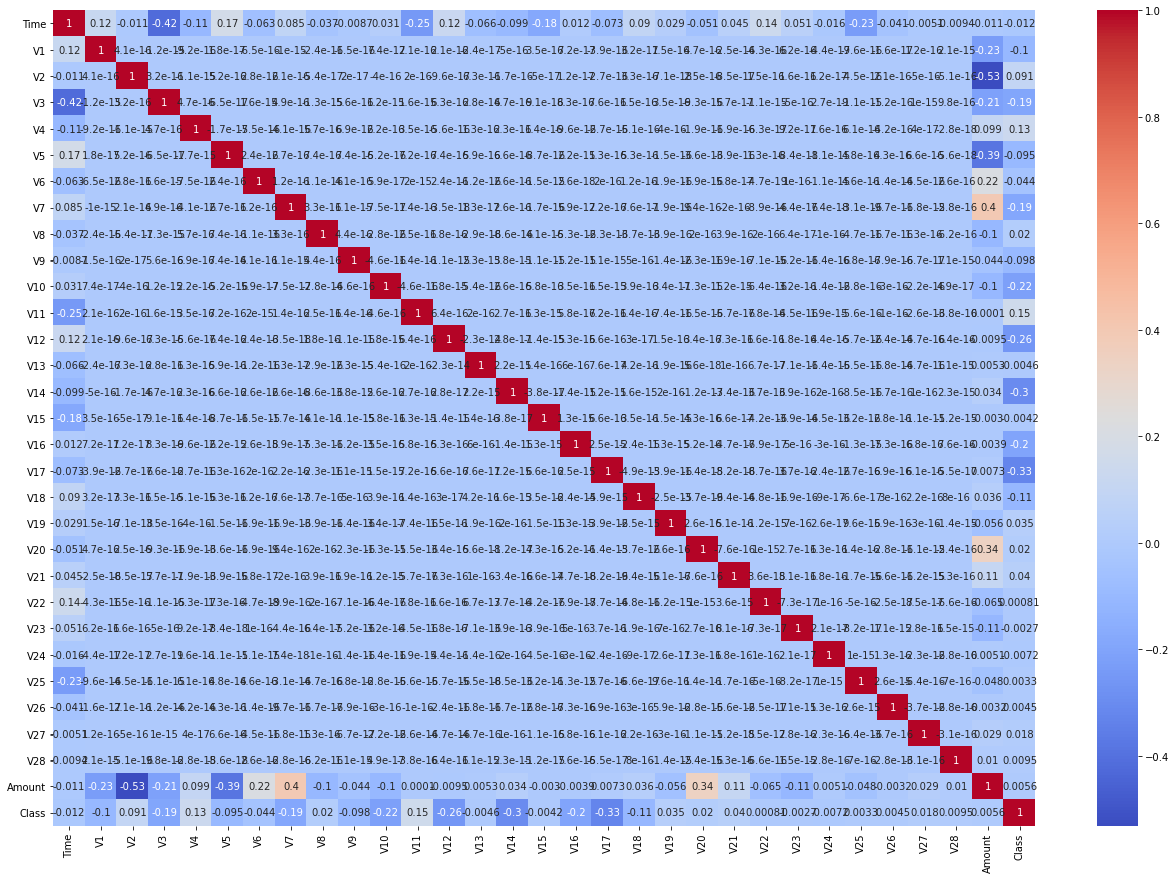

In [13]:
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Now we know that the top 2 independent variables {V4 and V11}, and the least 2independent variables {V14 and V17} should contains important information about whether a giving credit card transaction is fraudulent or not. They will be referred to as on the interesting variables.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

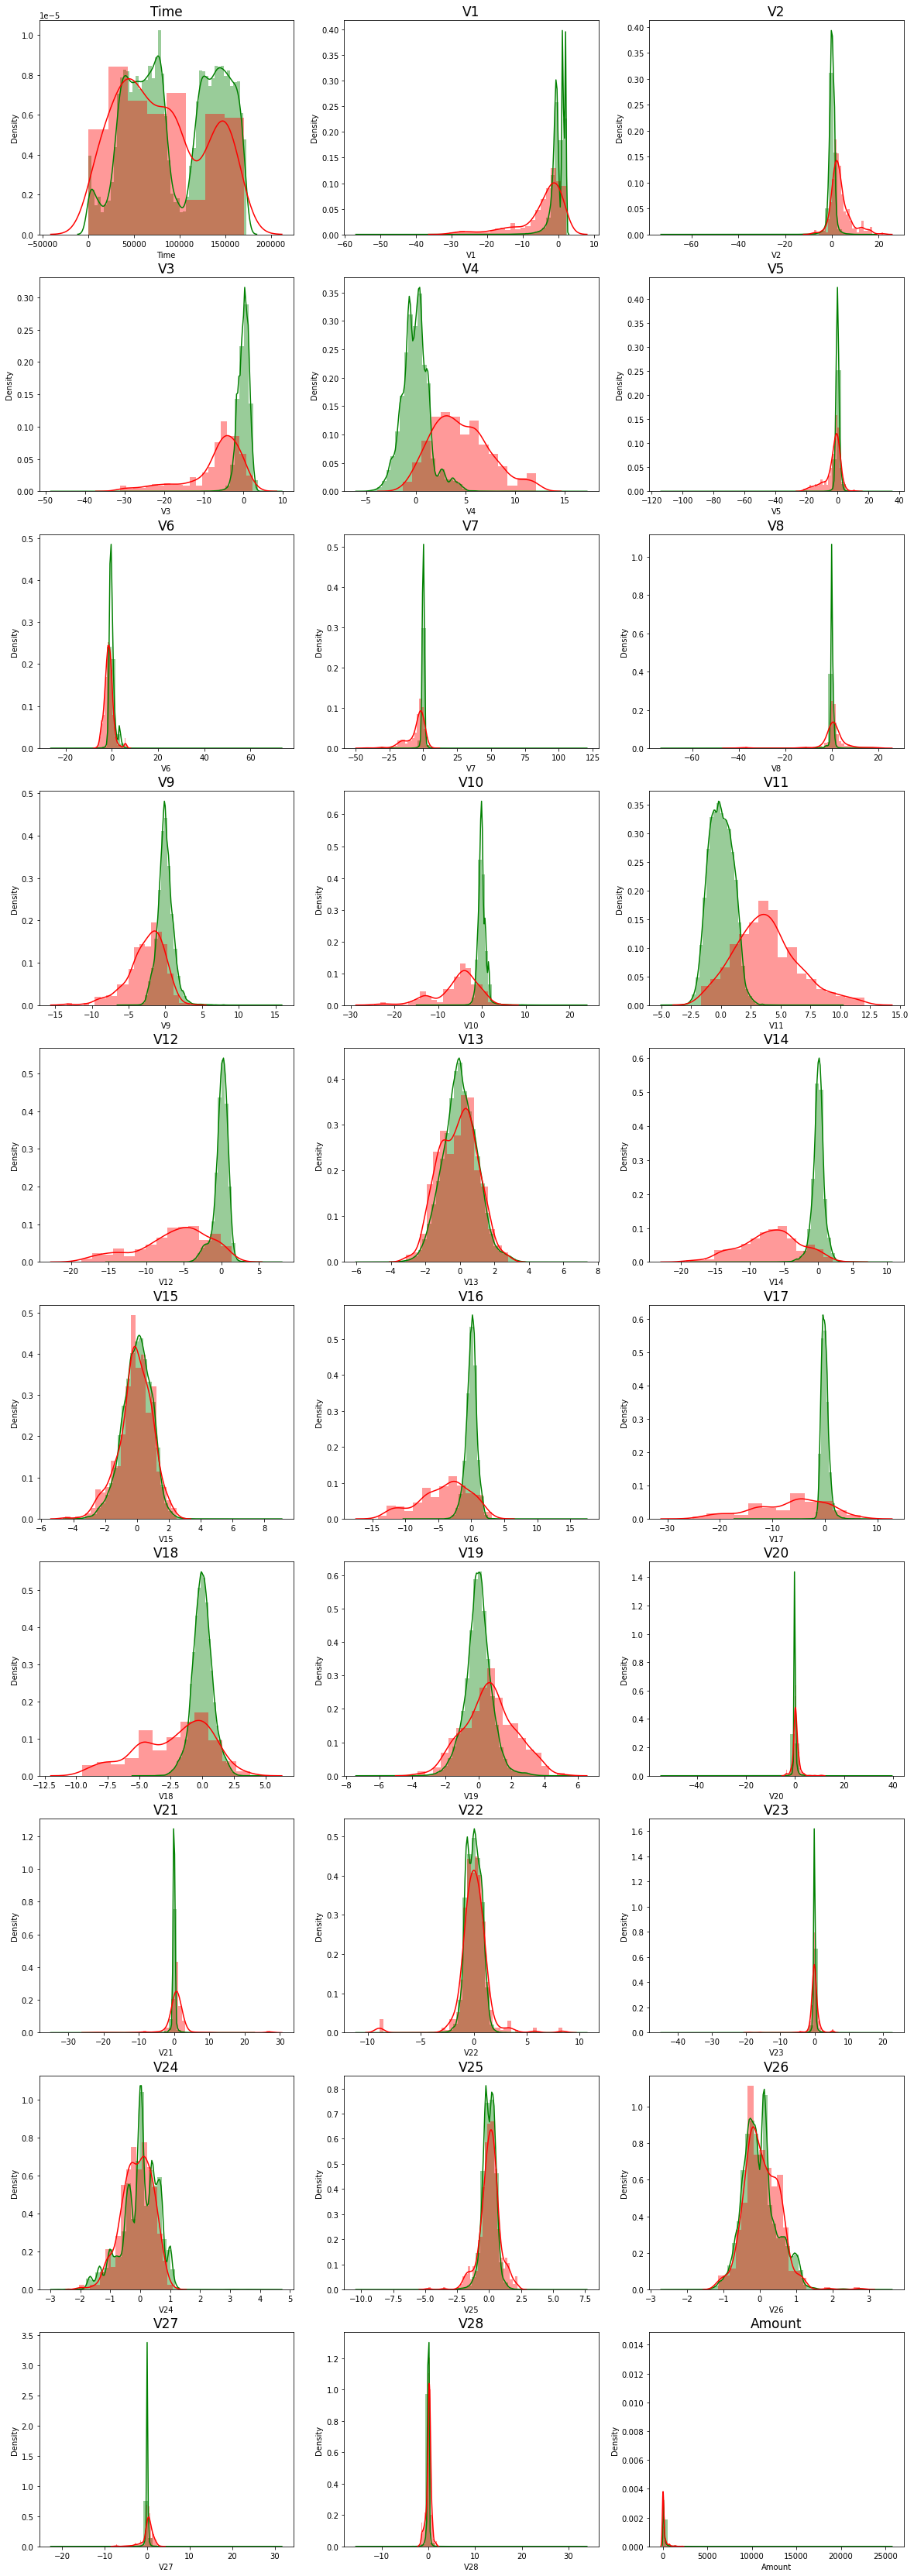

In [14]:
cols = list(X.columns.values)
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

### scatter plots

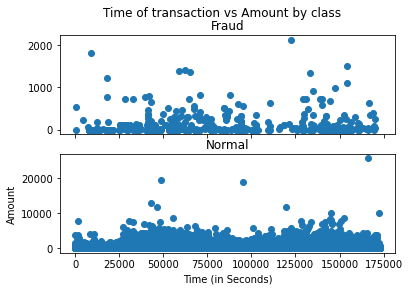

In [15]:
#visual transactions over time variable.
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Next we visualise the interesting relations that we obververd from the correlation matrix using scatter plots.

Plot each one of the interesting variables against a very boring variable V26 and color each label with Fraud or Not

<AxesSubplot:xlabel='V26', ylabel='V14'>

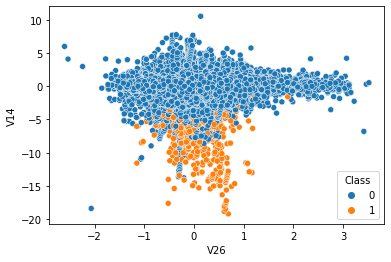

In [16]:
sns.scatterplot(x=df['V26'], y=df['V14'], hue=df['Class'])

<AxesSubplot:xlabel='V26', ylabel='V17'>

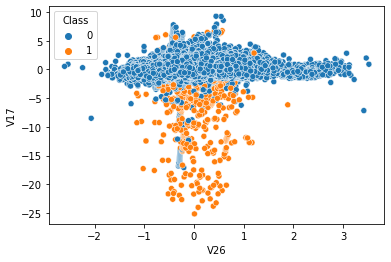

In [17]:
sns.scatterplot(x=df['V26'], y=df['V17'], hue=df['Class'])

Looking at the y-axis that hosts our interesting variables {V17and V14}, we notice that majority of the fraudulent data points are located below the value of -5 while the normal data points are located above.

In contrast, looking at the x-axis where the uninteresting variable is, there is no clear distiction between the data points as points are almost equally distributed between -3.5 and 3.5.

### Kernel density estimation plots

<AxesSubplot:xlabel='V14', ylabel='Density'>

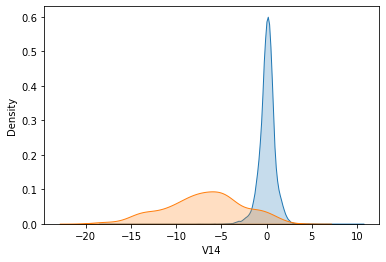

In [18]:
#Plot KDE V14 values for Class 0 (Normal)
sns.kdeplot(data=df[df['Class'] == 0]['V14'], label="Class 0", shade=True)
# Plot KDE V14 values for Class 1 (Fraud)
sns.kdeplot(df[df['Class'] == 1]['V14'], label="Class 1", shade=True)

<AxesSubplot:xlabel='V17', ylabel='Density'>

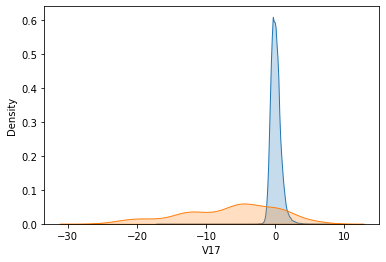

In [19]:
#Plot KDE V17 values for Class 0 (Normal)
sns.kdeplot(data=df[df['Class'] == 0]['V17'], label="Class 0", shade=True)
# Plot KDE V17 values for Class 1 (Fraud)
sns.kdeplot(data=df[df['Class'] == 1]['V17'], label="Class 1", shade=True)

#### now lets plot a contrasting positive variable

<AxesSubplot:xlabel='V4', ylabel='Density'>

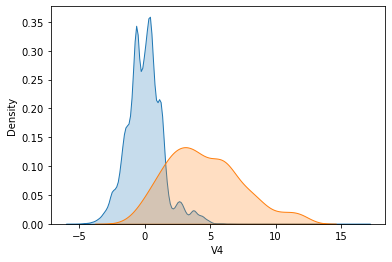

In [20]:
#Plot KDE V26 values for Class 0 (Normal)
sns.kdeplot(data=df[df['Class'] == 0]['V4'], label="Class 0", shade=True)
#Plot KDE V26 values for Class 0 (Normal)
sns.kdeplot(data=df[df['Class'] == 1]['V4'], label="Class 1", shade=True)

##### FINDINGS:
In the distribution of the interesting variables, our plot of both fraudulent and non-fraudulent transactions takes a similar shape to the standard normal distribution but with great height deviations.

In the positive variable distribuition, both fraudulent and non-fraudulent transactions have the similar height distribution but vary greatly in shape.

Using the interesting variables to draw analysis we may achieve an accuracy of 99% predicting whether a credit card transaction is fraudulent or normal.
In a business case, this may not be practical as it could mean investing in a lot of false positives and having to trade between precision and recal.

Training a model would be more efficient.

# Model Training and Evaluation

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import precision_score
#from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix, f1_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Feature Scaling
First we take a 30% fraction of data as our entire dataset to analyse and then we scale our variables.
Scaling our data and measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC) would be effective in our case of unbalanced data. This would improve the functionality of our model.

In [22]:
## Take a sample of the data
df= df.sample(frac = 0.3,random_state=5)

#Determine the number of fraud and normal transactions in sample dataset
#check for outliers
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]
outlier_fraction = len(Fraud)/float(len(Normal))

print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Normal Cases : {}".format(len(Normal)))

0.001735174807137665
Fraud Cases : 148
Normal Cases : 85294


In [23]:
#standardize our data
scaler = StandardScaler()
scaler.fit(df.drop('Class', axis = 1))
df.shape

(85442, 31)

In [24]:
scaled_df = scaler.transform(df.drop('Class', axis = 1))
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[:-1])
scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.267212,-0.117312,-1.945424,-0.451197,-0.686430,-0.950037,0.475988,0.224082,-0.020277,1.806265,...,2.070758,0.727324,0.001974,-1.544637,-2.017712,0.560245,0.302264,-0.238186,0.416389,3.074570
1,-0.978310,-0.150290,1.324351,-1.798159,0.921385,0.702165,-1.104636,0.746299,-0.110764,0.770244,...,0.710699,-0.569883,-0.696507,0.032379,-1.418760,-0.417515,-0.786641,0.555599,-0.646206,-0.255778
2,1.092426,-0.627528,0.334628,0.096431,-0.372742,1.882024,-0.126062,1.174677,-0.046990,-1.304944,...,0.294366,0.147546,-0.122899,-0.744455,-0.599231,2.693977,-1.134071,-0.159602,0.123346,-0.115378
3,-0.381835,0.606902,0.205828,0.276703,0.511830,-0.231844,-0.587210,0.025557,-0.085804,-0.032043,...,-0.136501,-0.319844,-0.878301,0.310514,0.605464,0.208999,0.213204,-0.012038,0.091550,-0.366788
4,0.952444,0.068987,0.153728,0.579657,-0.463654,-0.016293,0.114053,0.211105,0.064257,0.417587,...,0.033270,0.414306,1.370425,-0.005600,1.140512,-0.766330,1.329169,0.009628,0.037504,-0.168161


In [25]:
#assign X and Y values
X = scaled_df
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [26]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, pred_test)
    sns.heatmap(confusion_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix", fontsize=15)
    plt.ylabel('True labels', fontsize=10)
    plt.xlabel('predicted labels', fontsize=10)

In [27]:
#create a common function to plot AUPRC
def plot_AUPRC(model, X_test, y_test, probability):
    plot_precision_recall_curve(model, X_test, y_test)
    plt.plot([0,1], [0.00176,0.00176], linestyle='--')
    plt.legend(loc='best')
    print("The average precision_value: {0}" .format(average_precision_score(y_test,probability)))
    plt.show()

In [28]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Model','Methodology','Precision','F1_score','AUPRC'])

## Logistic Regression Algorithm
Logistic regression allows us to solve classification problems of discrete variables. Using a normal regression model would result in a very bad fit so instead we trasform the linear regression line to to a logistic model by inputing it into a sigmoid function. The sigmoid can take in a multiple variables but would only create outputs between 0 and 1. 

In [29]:
#fit a logistic regression model
logR = LogisticRegression()
logR.fit(X_train,y_train)

LogisticRegression()

In [30]:
logR_pred = logR.predict(X_test)
logR_prob = logR.predict_proba(X_test)[:, 1]
logR_prc = precision_score(y_test,logR_pred)
logR_F1 = f1_score(y_test,logR_pred)
logR_pris = average_precision_score(y_test,logR_prob)

In [31]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'Logistic Regresion | without Hyperparameter Tuning','Methodology': 'Sigmoid','Precision':logR_prc,'F1_score':logR_F1,'AUPRC':logR_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.95      0.60      0.73        30

    accuracy                           1.00     17089
   macro avg       0.97      0.80      0.87     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.8089022418641394


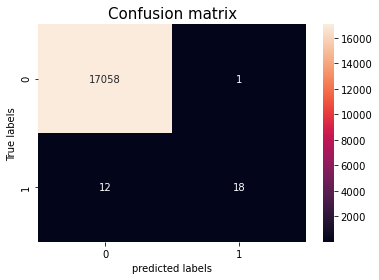

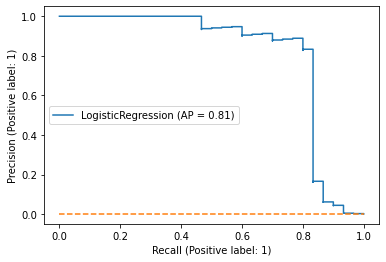

In [32]:
print(classification_report(y_test,logR_pred))

Plot_confusion_matrix(y_test,logR_pred)

plot_AUPRC (logR, X_test, y_test,logR_prob)

we can use a grid search to adjust to parameters of our model so it is better suited.

In [33]:
#adjust our parameters with gridsearch.
param_grid = {'penalty': ['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
logmod_grid = GridSearchCV(logR, param_grid, scoring ='accuracy', verbose=2)
logmod_grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.1s
[CV] END ................................C=0.001, penalty=l2; total time=   0.1s
[CV] END ................................C=0.001, penalty=l2; total time=   0.1s
[CV] END ................................C=0.001, penalty=l2; total time=   0.1s
[CV] END ................................C=0.001, penalty=l2; total time=   0.1s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [34]:
logmod_grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [35]:
logmod_grid.best_estimator_

LogisticRegression(C=0.1)

In [36]:
lr_pred = logmod_grid.predict(X_test)
lr_prob = logmod_grid.predict_proba(X_test)[:, 1]
lr_prc = precision_score(y_test,lr_pred)
lr_F1 = f1_score(y_test,lr_pred)
lr_av_pris = average_precision_score(y_test,lr_prob)

In [37]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'Logistic Regression | with GridSearch Hyperparameter Tuning','Methodology': 'Sigmoid','Precision':lr_prc,'F1_score':lr_F1,'AUPRC':lr_av_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.95      0.60      0.73        30

    accuracy                           1.00     17089
   macro avg       0.97      0.80      0.87     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.8063428684256966


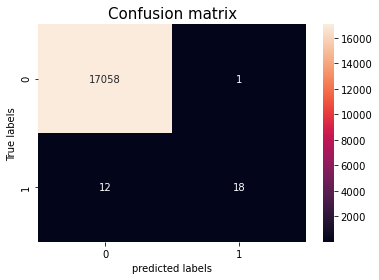

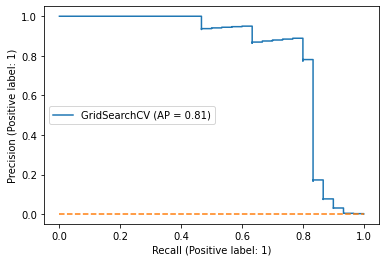

In [38]:
print(classification_report(y_test,lr_pred))

Plot_confusion_matrix(y_test,lr_pred)

plot_AUPRC (logmod_grid, X_test, y_test, lr_prob)

## K Nearest Neighbours Algorithim
The training algorithim of the KNN model first stores all the data. Next the Prediction algorithim calculates the distance from a new data point (X) to all the other points in our saved dataset and sorts the points in the dataset by increasing their distance from X. Lastly the model predicts the majority of the classes using the closest ponts of a K value.
Choosing a K-value would affect the validity of the model.

In [39]:
#use a random n_neighbour to fit a knn model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
knn_pred = knn.predict(X_test)
knn_prob = knn.predict_proba(X_test)[:, 1]
knn_prc = precision_score(y_test,knn_pred)
knn_F1 = f1_score(y_test,knn_pred)
knn_av_pris = average_precision_score(y_test,knn_prob)

In [41]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'K Nearest Neighbour KNN | without Hyperparameter Tuning','Methodology': 'Euclidean distance','Precision':knn_prc,'F1_score':knn_F1,'AUPRC':knn_av_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.88      0.77      0.82        30

    accuracy                           1.00     17089
   macro avg       0.94      0.88      0.91     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.6812463543277225


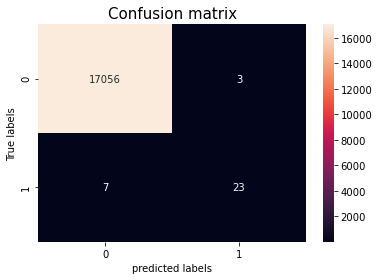

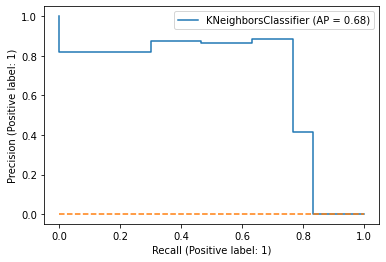

In [42]:
print(classification_report(y_test,knn_pred))

Plot_confusion_matrix(y_test,knn_pred)

plot_AUPRC (knn, X_test, y_test,knn_prob)

In [43]:
#knn with the elbow method
df_error =[]

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_k = knn.predict(X_test)
    df_error.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Error Rate')

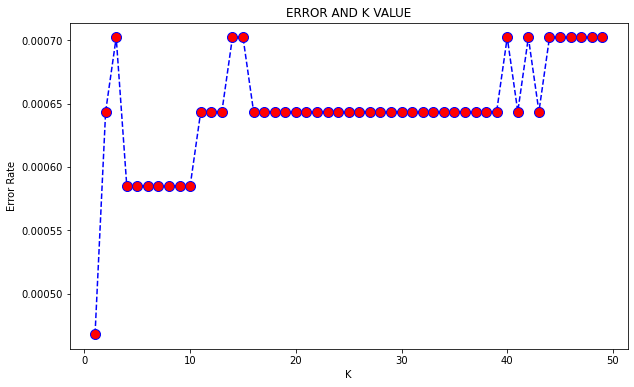

In [44]:
plt.figure(figsize = (10,6))
plt.plot(range(1,50), df_error, color= 'blue', linestyle = 'dashed', marker = 'o',
        markerfacecolor= 'red', markersize = 10)
plt.title('ERROR AND K VALUE')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [45]:
knn_elb = KNeighborsClassifier(n_neighbors=1)
knn_elb.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
pred = knn_elb.predict(X_test)
probs = knn_elb.predict_proba(X_test)[:, 1]
k_prc = precision_score(y_test,pred)
k_F1 = f1_score(y_test,pred)
k_av_pris = average_precision_score(y_test,probs)

In [47]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'K Nearest Neighbour | with Manual Hyperparameter Tuning','Methodology': 'Euclidean distance','Precision':k_prc,'F1_score':k_F1,'AUPRC':k_av_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.92      0.80      0.86        30

    accuracy                           1.00     17089
   macro avg       0.96      0.90      0.93     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.7388126415102834


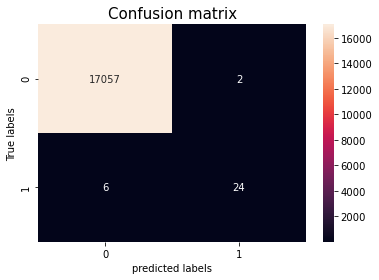

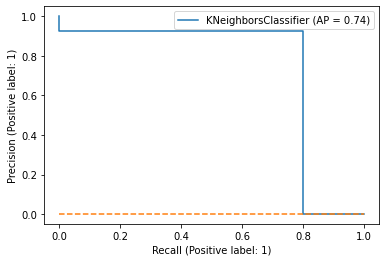

In [48]:
print(classification_report(y_test,pred))

Plot_confusion_matrix(y_test,pred)

plot_AUPRC (knn_elb, X_test, y_test,probs)

## Random Forest Algorithim

The Random Forest Algorithim does better as datasets get larger because it uses bagging to improve performance off single decision trees. It works best with imbalanced data because it creates an ensemble of decision trees with boothstrap samples from the training set. This allows for a new random sample to be chosen at each split for every single tree. It also allows the trees to be decorrelated, thereby reducing their dependence on each other and allowing the average to reduce the variance of each model so we are nor affected by the imbalance class data.

In [49]:
#fit a fandom forest model
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
rf1_pred = rf1.predict(X_test)
rf1_prob = rf1.predict_proba(X_test)[:, 1]
rf1_prc = precision_score(y_test,rf1_pred)
rf1_F1 = f1_score(y_test,rf1_pred)
rf1_av_pris = average_precision_score(y_test,rf1_prob)

In [51]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'Random Forest | without Hyperparameter Tuning','Methodology': 'Boothstrap','Precision':rf1_prc,'F1_score':rf1_F1,'AUPRC':rf1_av_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.91      0.70      0.79        30

    accuracy                           1.00     17089
   macro avg       0.96      0.85      0.90     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.7971208253951007


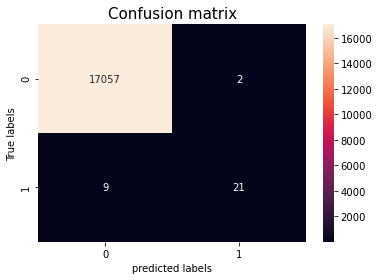

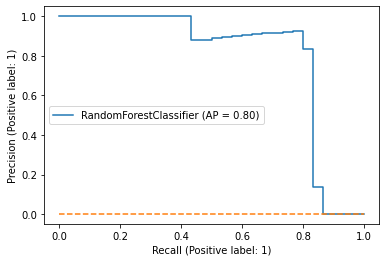

In [52]:
print(classification_report(y_test,rf1_pred))

Plot_confusion_matrix(y_test,rf1_pred)

plot_AUPRC (rf1, X_test, y_test, rf1_prob)

In [53]:
#fit a fandom forest model
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [54]:
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]
rf_prc = precision_score(y_test,rf_pred)
rf_F1 = f1_score(y_test,rf_pred)
rf_av_pris = average_precision_score(y_test,rf_prob)

In [55]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'Random Forest | with Manual Hyperparameter Tuning','Methodology': 'Boothstrap','Precision':rf_prc,'F1_score':rf_F1,'AUPRC':rf_av_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.92      0.73      0.81        30

    accuracy                           1.00     17089
   macro avg       0.96      0.87      0.91     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.814632361617049


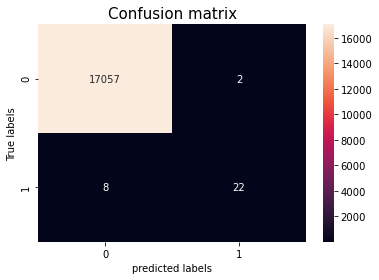

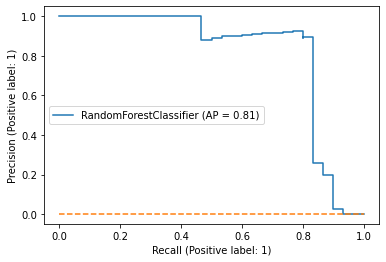

In [56]:
print(classification_report(y_test,rf_pred))

Plot_confusion_matrix(y_test,rf_pred)

plot_AUPRC (rf, X_test, y_test, rf_prob)

## XGBOOST ALGORITHM

In [57]:
#Evaluate XGboost model
XGBmodel = XGBClassifier(random_state=42, use_label_encoder = False)
XGBmodel.fit(X_train, y_train)

[22:48:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [58]:
XGB_pred = XGBmodel.predict(X_test)
XGB_prob = XGBmodel.predict_proba(X_test)[:, 1]
XGB_prc = precision_score(y_test,XGB_pred)
XGB_F1 = f1_score(y_test,XGB_pred)
XGB_av_pris = average_precision_score(y_test,XGB_prob)

In [59]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'XGBoost | without Hyperparameter Tuning','Methodology': 'reg:squared error','Precision':XGB_prc,'F1_score':XGB_F1,'AUPRC':XGB_av_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.92      0.77      0.84        30

    accuracy                           1.00     17089
   macro avg       0.96      0.88      0.92     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.8455494522423725


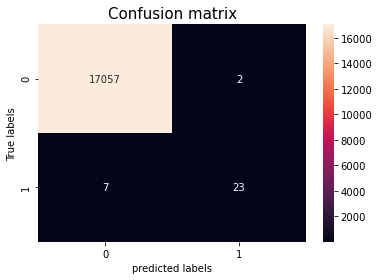

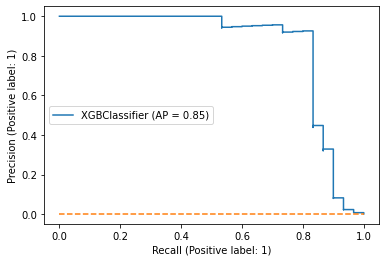

In [60]:
print(classification_report(y_test,XGB_pred))

Plot_confusion_matrix(y_test,XGB_pred)

plot_AUPRC (XGBmodel, X_test, y_test,XGB_prob)

## Super Vector Machines Algorithim
This is a non-probabilistic binary linear classifier that builds algorithms by assigning samples into one category or another. It then seperates these categories within a gap using a hyperplane, maps new samples into that same gap and predicts its category gased on which side of the plane it falls on. Choosing the best hyperplane means deciding on the margin that maximizes both classes with the help of support vectors. The Super Vector Machine model allows the tuning of our model through the use of a grid search, it also provides for the possibility of working with non-linearly separable data by viewing it in a higher dimension. This process is referred to as the kernel trick.

In [61]:
#fit an svm model
svm = SVC()
svm.fit(X_train, y_train) 

SVC()

In [62]:
svm_pred = svm.predict(X_test)
svm_prob = rf.predict_proba(X_test)[:, 1]
svm_prc = precision_score(y_test,svm_pred)
svm_F1 = f1_score(y_test,svm_pred)
svm_av_pris = average_precision_score(y_test,svm_prob)

In [63]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'Super Vector Machines | without Hyperparameter Tuning','Methodology': 'Kernel','Precision':svm_prc,'F1_score':svm_F1,'AUPRC':svm_av_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.92      0.37      0.52        30

    accuracy                           1.00     17089
   macro avg       0.96      0.68      0.76     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.814632361617049


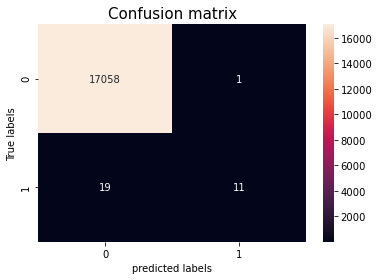

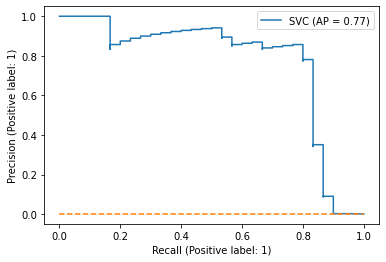

In [64]:
print(classification_report(y_test,svm_pred))

Plot_confusion_matrix(y_test,svm_pred)

plot_AUPRC (svm, X_test, y_test, svm_prob)

In [65]:
#adjust our parameters with gridsearch.

param_grid = {'C':[1,10], 'gamma':[0.1,0.01]}
svm_grid = GridSearchCV(SVC(probability=True), param_grid, verbose=2)
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................................C=1, gamma=0.1; total time= 9.1min
[CV] END .....................................C=1, gamma=0.1; total time= 7.2min
[CV] END .....................................C=1, gamma=0.1; total time= 7.8min
[CV] END .....................................C=1, gamma=0.1; total time= 7.5min
[CV] END .....................................C=1, gamma=0.1; total time= 7.0min
[CV] END ....................................C=1, gamma=0.01; total time=  21.9s
[CV] END ....................................C=1, gamma=0.01; total time=  26.6s
[CV] END ....................................C=1, gamma=0.01; total time=  22.0s
[CV] END ....................................C=1, gamma=0.01; total time=  22.4s
[CV] END ....................................C=1, gamma=0.01; total time=  21.2s
[CV] END ....................................C=10, gamma=0.1; total time= 4.7min
[CV] END ....................................C=10

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [1, 10], 'gamma': [0.1, 0.01]}, verbose=2)

In [66]:
svm_grid.best_params_

{'C': 10, 'gamma': 0.01}

In [67]:
svm_grid.best_estimator_

SVC(C=10, gamma=0.01, probability=True)

In [68]:
grid_pred = svm_grid.predict(X_test)
grid_prob = svm_grid.predict_proba(X_test)[:, 1]
grid_prc = precision_score(y_test,grid_pred)
grid_F1 = f1_score(y_test,grid_pred)
grid_av_pris = average_precision_score(y_test,grid_prob)

In [69]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'Super Vector Machines| with GridSearch Hyperparameter Tuning','Methodology': 'Kernel','Precision':grid_prc,'F1_score':grid_F1,'AUPRC':grid_av_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.92      0.73      0.81        30

    accuracy                           1.00     17089
   macro avg       0.96      0.87      0.91     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.8012375029370081


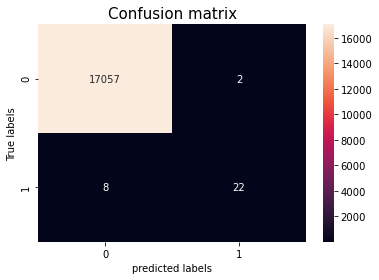

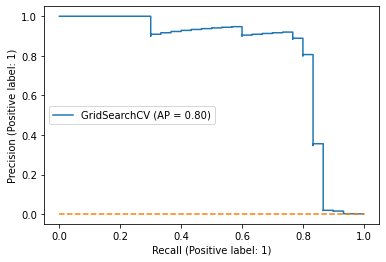

In [70]:
print(classification_report(y_test,grid_pred))

Plot_confusion_matrix(y_test,grid_pred)

plot_AUPRC (svm_grid, X_test, y_test,grid_prob)

## Model Selection

In [71]:
#print df result
df_Results

,Model,Methodology,Precision,F1_score,AUPRC
0,Logistic Regresion | without Hyperparameter Tu...,Sigmoid,0.947368,0.734694,0.808902
1,Logistic Regression | with GridSearch Hyperpar...,Sigmoid,0.947368,0.734694,0.806343
2,K Nearest Neighbour KNN | without Hyperparamet...,Euclidean distance,0.884615,0.821429,0.681246
3,K Nearest Neighbour | with Manual Hyperparamet...,Euclidean distance,0.923077,0.857143,0.738813
4,Random Forest | without Hyperparameter Tuning,Boothstrap,0.913043,0.792453,0.797121
5,Random Forest | with Manual Hyperparameter Tuning,Boothstrap,0.916667,0.814815,0.814632
6,XGBoost | without Hyperparameter Tuning,reg:squared error,0.920000,0.836364,0.845549
7,Super Vector Machines | without Hyperparameter...,Kernel,0.916667,0.523810,0.814632
8,Super Vector Machines| with GridSearch Hyperpa...,Kernel,0.916667,0.814815,0.801238


Analysing the models above, it is best to select a model based on the F1_score and the Area Under Precision-Recal Curve(AUPRC) as they show a true test of how well the model is performing as, against the precision. This is as a result of the imbalanced class of the dataset.

The best two(2) performing models using the F1_score are the K Nearest Neighbour with n-neighbour = 1 and the XGBoost with F1_scores of 0.857143 and 0.836364 respectively. While the best two(2) performing models using the AUPRC are the XGBoost and the Random Forest Classifier with AUPRC of 0.845549 and 0.824721 respectively.

We would go ahead to handle the imbalance class of the best three preforming model to ascertain if we can make our models perform any better.

## Handling Class Imbalance with Oversampling
This is the process of increasing the samples of the minority class in a dataset by duplicating its records to match the sample of the majority class


<AxesSubplot:xlabel='Class', ylabel='count'>

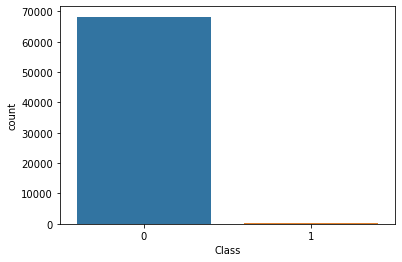

In [72]:
#visual of the records before over sampling
sns.countplot(y_train)

In [73]:
#balance the class with equal distribuition
from imblearn.over_sampling import SMOTE

In [74]:
over_sample = SMOTE()
X_smote, y_smote = over_sample.fit_resample(X_train,y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

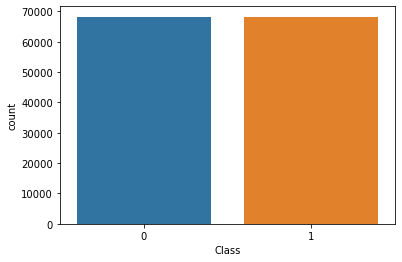

In [75]:
sns.countplot(y_smote)

## K Nearest Neighbours Algorithim with SMOTE

In [76]:
#use a random n_neighbour to fit a knn model
knns = KNeighborsClassifier(n_neighbors=1)
knns.fit(X_smote,y_smote)

KNeighborsClassifier(n_neighbors=1)

In [77]:
knns_pred = knns.predict(X_test)
knns_prob = knns.predict_proba(X_test)[:, 1]
knns_prc = precision_score(y_test, knns_pred)
knns_F1 = f1_score(y_test, knns_pred)
knns_av_pris = average_precision_score(y_test, knns_prob)

In [78]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'K Nearest Neighbour KNN|with SMOTE|with Manual Hyperparameter Tuning','Methodology': 'Euclidean distance','Precision':knns_prc,'F1_score':knns_F1,'AUPRC':knns_av_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.57      0.83      0.68        30

    accuracy                           1.00     17089
   macro avg       0.78      0.92      0.84     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.4737774343588026


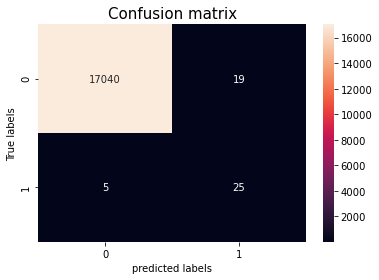

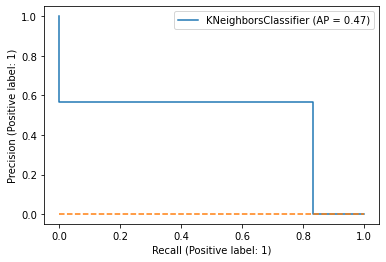

In [79]:
print(classification_report(y_test,knns_pred))

Plot_confusion_matrix(y_test,knns_pred)

plot_AUPRC (knns, X_test, y_test,knns_prob)

## Random Forest Algorithim with SMOTE

In [80]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_smote, y_smote)

RandomForestClassifier(n_estimators=300)

In [81]:
rfc_pred = rfc.predict(X_test)
rfc_prob = rfc.predict_proba(X_test)[:, 1]
rfc_prc = precision_score(y_test,rfc_pred)
rfc_F1 = f1_score(y_test,rfc_pred)
rfc_av_pris = average_precision_score(y_test,rfc_prob)

In [82]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'Random Forest|with SMOTE|with Manual Hyperparameter Tuning','Methodology': 'Boothstrap','Precision':rfc_prc,'F1_score':rfc_F1,'AUPRC':rfc_av_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.92      0.80      0.86        30

    accuracy                           1.00     17089
   macro avg       0.96      0.90      0.93     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.8147877621850708


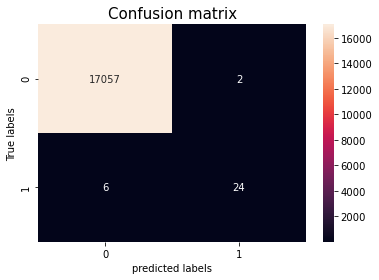

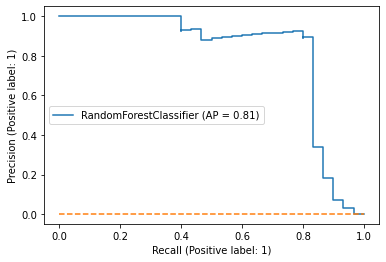

In [83]:
print(classification_report(y_test,rfc_pred))

Plot_confusion_matrix(y_test,rfc_pred)

plot_AUPRC (rfc, X_test, y_test, rfc_prob)

## XGBOOST ALGORITHM with SMOTE

In [84]:
#Evaluate XGboost model
XGBSmodel = XGBClassifier(random_state=42, use_label_encoder = False)
XGBSmodel.fit(X_smote, y_smote)

[23:56:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [85]:
XGBS_pred = XGBSmodel.predict(X_test)
XGBS_prob = XGBSmodel.predict_proba(X_test)[:, 1]
XGBS_prc = precision_score(y_test,XGBS_pred)
XGBS_F1 = f1_score(y_test,XGBS_pred)
XGBS_av_pris = average_precision_score(y_test,XGBS_prob)

In [86]:
df_Results = df_Results.append(pd.DataFrame({'Model': 'XGBoost | with SMOTE','Methodology': 'reg:squared error','Precision':XGBS_prc,'F1_score':XGBS_F1,'AUPRC':XGBS_av_pris}, index=[0]),ignore_index= True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.86      0.83      0.85        30

    accuracy                           1.00     17089
   macro avg       0.93      0.92      0.92     17089
weighted avg       1.00      1.00      1.00     17089

The average precision_value: 0.8221292184608595


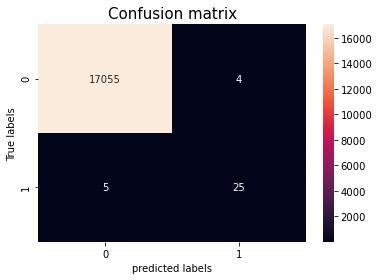

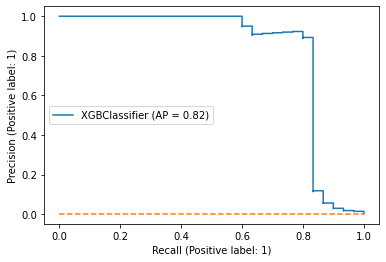

In [87]:
print(classification_report(y_test,XGBS_pred))

Plot_confusion_matrix(y_test,XGBS_pred)

plot_AUPRC (XGBSmodel, X_test, y_test,XGBS_prob)

## Model Re-Selection

In [88]:
#print new results with oversampling
df_Results

,Model,Methodology,Precision,F1_score,AUPRC
0,Logistic Regresion | without Hyperparameter Tu...,Sigmoid,0.947368,0.734694,0.808902
1,Logistic Regression | with GridSearch Hyperpar...,Sigmoid,0.947368,0.734694,0.806343
2,K Nearest Neighbour KNN | without Hyperparamet...,Euclidean distance,0.884615,0.821429,0.681246
3,K Nearest Neighbour | with Manual Hyperparamet...,Euclidean distance,0.923077,0.857143,0.738813
4,Random Forest | without Hyperparameter Tuning,Boothstrap,0.913043,0.792453,0.797121
5,Random Forest | with Manual Hyperparameter Tuning,Boothstrap,0.916667,0.814815,0.814632
6,XGBoost | without Hyperparameter Tuning,reg:squared error,0.920000,0.836364,0.845549
7,Super Vector Machines | without Hyperparameter...,Kernel,0.916667,0.523810,0.814632
8,Super Vector Machines| with GridSearch Hyperpa...,Kernel,0.916667,0.814815,0.801238
9,K Nearest Neighbour KNN|with SMOTE|with Manual...,Euclidean distance,0.568182,0.675676,0.473777


After over_sampling, the KNN model no longer performs well and its area under the PR curve is less than average. 

The Random Forest and XGBoost however similarly well with the Ramdom Forest attaining a better F1_score of 0.857143. 

## Conclusion
In the oversampled cases of all the models we built, the Random Forest model with SMOTE gave us the best F1_score, Precision and AUPRC with the below metrices :

Random Forest precision:0.923077, Random Forest f1_SCORE: 0.857143, Random Forest AUPRC:0.816713

However, of all the models we created we found the K Nearest neighbour KNN (without any oversampling or fitting) gave us the best result.